In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [91]:
root_dir = Path("../")
data_path = root_dir / "data" / "processed" / "teleco_churn_final.csv"

try:
    df = pd.read_csv(data_path)
    print(f"Dimensiones del dataset: {df.shape} (Filas, Columnas)")
except FileNotFoundError:
    print("Error: No se encuentra el archivo.")

Dimensiones del dataset: (7032, 31) (Filas, Columnas)


In [92]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7032 non-null   int64  
 5   gender_Male                            7032 non-null   int64  
 6   Partner_Yes                            7032 non-null   int64  
 7   Dependents_Yes                         7032 non-null   int64  
 8   PhoneService_Yes                       7032 non-null   int64  
 9   MultipleLines_No phone service         7032 non-null   int64  
 10  MultipleLines_Yes                      7032 non-null   int64  
 11  Inte

In [94]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785,0.504693,0.482509,0.298493,0.903299,0.096701,...,0.216155,0.384386,0.216155,0.388367,0.209329,0.239619,0.592719,0.216297,0.336320,0.228100
std,0.368844,24.545260,30.085974,2266.771362,0.441782,0.500014,0.499729,0.457629,0.295571,0.295571,...,0.411650,0.486484,0.411650,0.487414,0.406858,0.426881,0.491363,0.411748,0.472483,0.419637
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [96]:
df['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [97]:
# axis=1 significa "borrar columna" (vertical), no fila.
X = df.drop('Churn', axis=1)
y = df['Churn']


In [98]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [99]:
print(f"Entrenamiento: {X_train.shape[0]} datos")
print(f"Prueba: {X_test.shape[0]} datos")

Entrenamiento: 5625 datos
Prueba: 1407 datos


In [100]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(
        max_iter=2000,
        random_state=42
    ))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [101]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy * 100:.2f}%")


Accuracy del modelo: 78.75%


In [102]:
cm = confusion_matrix(y_test, y_pred)

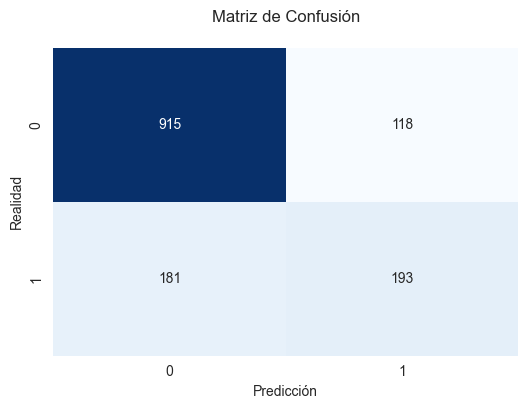

In [103]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión\n')
plt.show()

In [104]:
# Obtener nombres de columnas y coeficientes
weights = pipeline.named_steps['model'].coef_[0]
features = X.columns

In [105]:
weights

array([ 0.09497563, -1.44574746, -0.63280053,  0.69488483, -0.01575645,
        0.0250577 , -0.09984789, -0.02973553,  0.02973553,  0.16054554,
        0.65074919, -0.07406809, -0.07406809, -0.15552048, -0.07406809,
       -0.00905049, -0.07406809,  0.04012931, -0.07406809, -0.14348201,
       -0.07406809,  0.2129627 , -0.07406809,  0.22244002, -0.31456215,
       -0.56739595,  0.13458001, -0.0578111 ,  0.12355797, -0.0275895 ])

In [106]:
features

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [107]:
feature_importance = pd.DataFrame({'Feature': features, 'Weight': weights})
feature_importance = feature_importance.sort_values(by='Weight', ascending=False)

In [108]:
feature_importance.head(10)

,Feature,Weight
3,TotalCharges,0.694885
10,InternetService_Fiber optic,0.650749
23,StreamingMovies_Yes,0.222440
21,StreamingTV_Yes,0.212963
9,MultipleLines_Yes,0.160546
26,PaperlessBilling_Yes,0.134580
28,PaymentMethod_Electronic check,0.123558
0,SeniorCitizen,0.094976
17,DeviceProtection_Yes,0.040129
8,MultipleLines_No phone service,0.029736


In [109]:
feature_importance.tail()

,Feature,Weight
13,OnlineSecurity_Yes,-0.155520
24,Contract_One year,-0.314562
25,Contract_Two year,-0.567396
2,MonthlyCharges,-0.632801
1,tenure,-1.445747


In [110]:
feature_importance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 3 to 1
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Feature  30 non-null     object 
 1   Weight   30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 720.0+ bytes


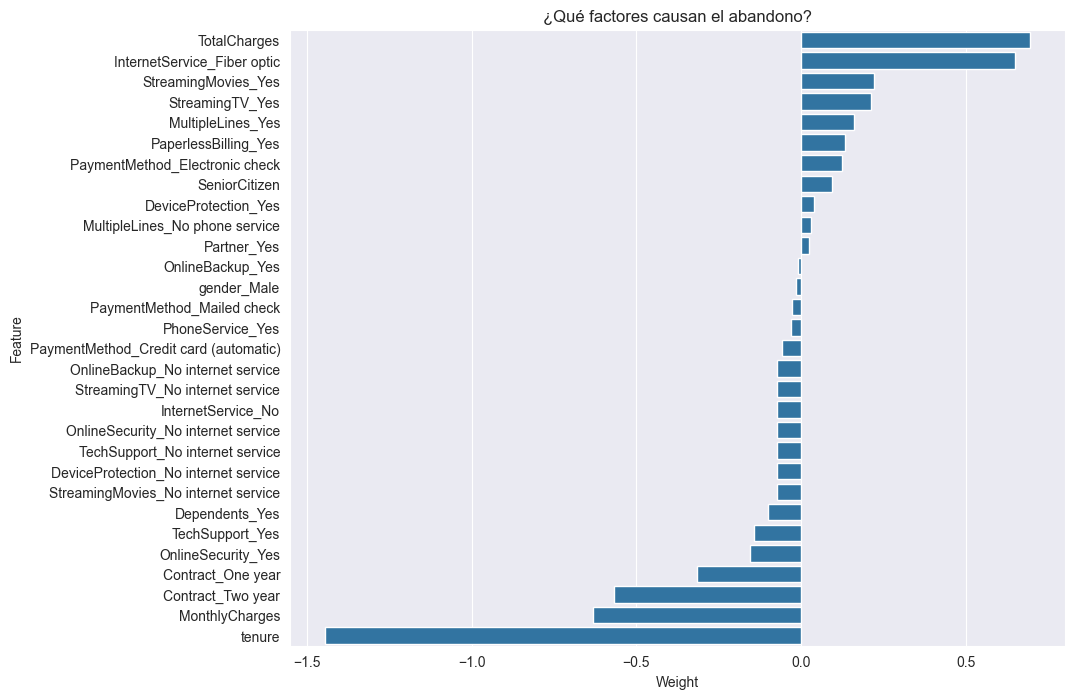

In [111]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='Weight', y='Feature', data=feature_importance, ax=ax)
ax.set_title('¿Qué factores causan el abandono?')

output_path = root_dir / "reports" / "figures" / "feature_importance.png"
output_path.parent.mkdir(parents=True, exist_ok=True)
fig.savefig(output_path, bbox_inches='tight', dpi=1200)
plt.show()

In [112]:
fig.savefig(root_dir / "reports" / "figures" / "feature_importance.png")

In [113]:
model_path = root_dir / "models" / "modelo_churn_v1.pkl"

joblib.dump(pipeline, model_path)

print(f"Modelo guardado exitosamente en: {model_path}")

Modelo guardado exitosamente en: ..\models\modelo_churn_v1.pkl
